**Notebook to plot the results of the experiments explored in the Final Degree Project.**

### Plots

**Example:**

* [Graph example](#chapter1)
* [Plots of the small experiment](#chapter19)

**Degree in scenarios without nodes without preference:**

* [Effect of $P_0$ and $P_1$ in absence of nodes without preference](#chapter2)
* [Class degree variation for several values of $C_0$ and $C_1$](#chapter3)
* [Degree distribution for several values of $C_0$ and $C_1$](#chapter4)
* [Network examples for several values of $C_0$ and $C_1$](#chapter5)

**Network examples:**

* [Example of networks in scenarios in which $P_{0,i} = P_{1,i} = 1$](#chapter6)
* [Example of networks in scenarios in which the minority class is advantaged](#chapter7)
* [Example of networks in scenarios in which the majority class is advantaged](#chapter8)

**Scenarios with nodes without preference:**

* [Minority class degree in scenarios without expected overrepresentation of any class](#chapter9)
* [Relative overrepresentation of the minority class for several values of $m$](#chapter10)
* [Relative overrepresentation of the majority class for several values of $m$](#chapter11)
* [Minority class degree in favourable scenarios](#chapter12)
* [Majority class degree in unfavourable scenarios](#chapter13)
* [Majority class degree in favourable scenarios](#chapter14)
* [Minority class degree in unfavourable scenarios](#chapter15)
* [Few-get-richer effect (also the plots in the appendix)](#chapter16)
* [Degree growth and degree distribution plots (Appendix)](#chapter17)
* [Degree distribution anomalies (Appendix)](#chapter18)

In [4]:
import numpy as np
import networkx as nx
import statistics
import math
import random
import os
from collections import Counter
import matplotlib.pyplot as plt

import model, graphics

base_colors = ['orange', 'blue']

### Graph example <a class="anchor" id="chapter1"></a>

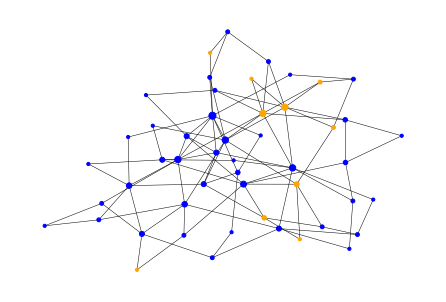

In [5]:
# Set parameters and create the graph
G, node_class, k_majority, k_minority = model.model(n=50, m=2, m0=10, c0=0.8, p0=0.8, p1=0.2, p0i=0, p1i=0, beta=1.1)

# Plot resulting graph
node_color = ['blue' if c == 0 else 'orange' for c in node_class]
node_size = np.array(list(dict(G.degree()).values())) * 5
nx.draw(G, node_color=node_color, node_size=node_size, width=0.5)
plt.show()

### Plots of the small experiments <a class="anchor" id="chapter19"></a>

We will plot the average degree of each class in the small experiments executed in *run_experiments.ipynb*.

In [6]:
# folder in which the data is stored
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs/test_data'

In [7]:
# set the parameters of each experiment
n = 500
m0 = 10
m = 5
c0 = [0.8, 0.8, 0.8, 0.8]
c1 = [0.2, 0.2, 0.2, 0.2]
p0 = [1, 0.7, 0.3, 0]
p1 = [0, 0.3, 0.7, 1]
p0i = [0, 0, 0, 0]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority, avg_degree_minority, std_degree_majority, std_degree_minority, degree_dist_majority, degree_dist_minority, degree_growth_majority_experiment, degree_growth_minority_experiment, results, step, avg_degree_majority_list, avg_degree_minority_list = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

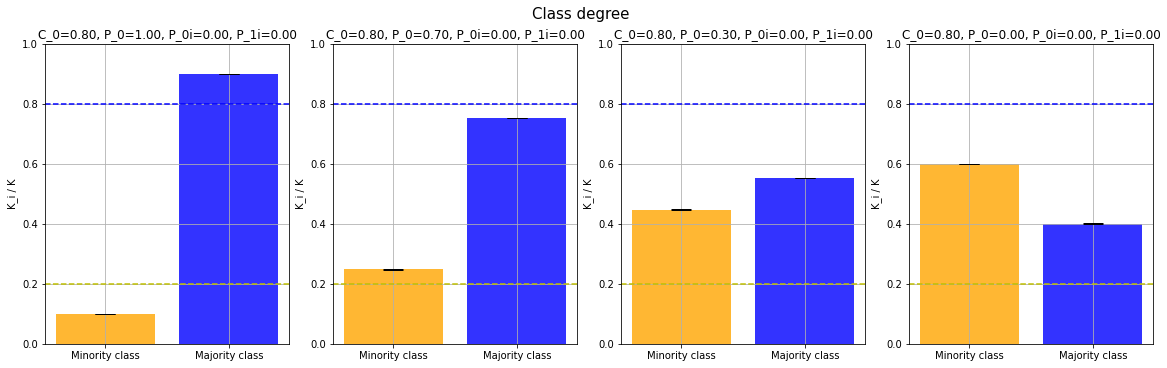

In [9]:
# Average degree barplot
fig, axes = plt.subplots(1, len(c0), figsize=(16,5), constrained_layout=True)
fig.suptitle('Class degree', fontsize=15)

for i in range(len(c0)):
    x = ['Minority class', 'Majority class']
    y = [avg_degree_minority[i], avg_degree_majority[i]]
    error = [std_degree_minority[i], std_degree_majority[i]]
    axes[i].bar(x, 
                y,
                yerr=error,
                align='center',
                alpha=0.8,
                ecolor='black',
                capsize=10,
                color=base_colors)

    axes[i].set_title('C_0=%.2f, P_0=%.2f, P_0i=%.2f, P_1i=%.2f' % (c0[i], p0[i], p0i[i], p1i[i]))
    axes[i].set_ylabel('K_i / K')
    axes[i].set_ylim(0.0, 1.0)
    # Reference lines
    axes[i].axhline(c0[i], linestyle='--', color='b')
    axes[i].axhline(c1[i], linestyle='--', color='y')
    axes[i].grid()

plt.show()

### Effect of $P_0$ and $P_1$ in absence of nodes without preference <a class="anchor" id="chapter2"></a>

In [3]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/plot_1'                

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.9, 0.9, 0.9, 0.9]
c1 = [0.1, 0.1, 0.1, 0.1, 0.1]
p0 = [1, 0.8, 0.5, 0.2, 0]
p1 = [0, 0.2, 0.5, 0.8, 1]
p0i = [0, 0, 0, 0, 0]
p1i = [0, 0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [4]:
n = 5000
m0 = 10
m = 5
c0 = [0.8, 0.8, 0.8, 0.8, 0.8]
c1 = [0.2, 0.2, 0.2, 0.2, 0.2]
p0 = [1, 0.8, 0.5, 0.2, 0]
p1 = [0, 0.2, 0.5, 0.8, 1]
p0i = [0, 0, 0, 0, 0]
p1i = [0, 0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [5]:
n = 5000
m0 = 10
m = 5
c0 = [0.7, 0.7, 0.7, 0.7, 0.7]
c1 = [0.3, 0.3, 0.3, 0.3, 0.3]
p0 = [1, 0.8, 0.5, 0.2, 0]
p1 = [0, 0.2, 0.5, 0.8, 1]
p0i = [0, 0, 0, 0, 0]
p1i = [0, 0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [6]:
n = 5000
m0 = 10
m = 5
c0 = [0.6, 0.6, 0.6, 0.6, 0.6]
c1 = [0.4, 0.4, 0.4, 0.4, 0.4]
p0 = [1, 0.8, 0.5, 0.2, 0]
p1 = [0, 0.2, 0.5, 0.8, 1]
p0i = [0, 0, 0, 0, 0]
p1i = [0, 0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_4, avg_degree_minority_4, std_degree_majority_4, std_degree_minority_4, degree_dist_majority_4, degree_dist_minority_4, degree_growth_majority_experiment_4, degree_growth_minority_experiment_4, results_4, step_4, avg_degree_majority_list_4, avg_degree_minority_list_4 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

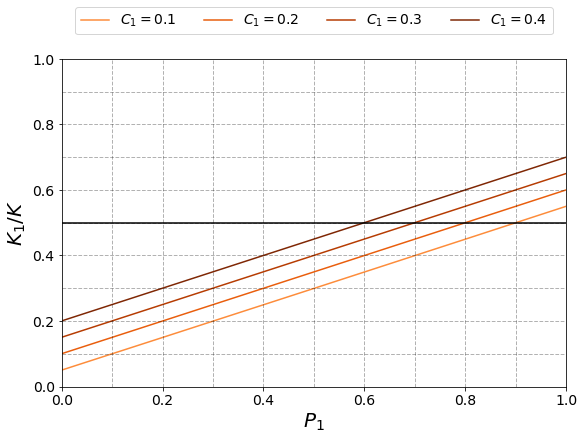

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)

x = [0, 0.2, 0.5, 0.8, 1]

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Oranges(x) for x in evenly_spaced_interval]

plt.plot(x, avg_degree_minority_1, color=colors[0])
plt.plot(x, avg_degree_minority_2, color=colors[1])
plt.plot(x, avg_degree_minority_3, color=colors[2])
plt.plot(x, avg_degree_minority_4, color=colors[3])

plt.plot([-0.5, 1.5], [0.5, 0.5], color='k')

plt.legend([r"$C_1=0.1$", r"$C_1=0.2$", r"$C_1=0.3$", r"$C_1=0.4$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=14)

for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axvline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)

#plt.grid()
plt.ylabel(r"$K_1 / K$", fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel(r"$P_1$", fontsize=20)
plt.yticks(fontsize=14)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

### Class degree variation for several values of $C_0$ and $C_1$ <a class="anchor" id="chapter3"></a>

In [8]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/plot_2'

In [9]:
n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6,]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = [0.5, 0.5, 0.5, 0.5]
p1 = [0.5, 0.5, 0.5, 0.5]
p0i = [0, 0, 0, 0, 0]
p1i = [0, 0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority, avg_degree_minority, std_degree_majority, std_degree_minority, degree_dist_majority, degree_dist_minority, degree_growth_majority_experiment, degree_growth_minority_experiment, results, step, avg_degree_majority_list, avg_degree_minority_list = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

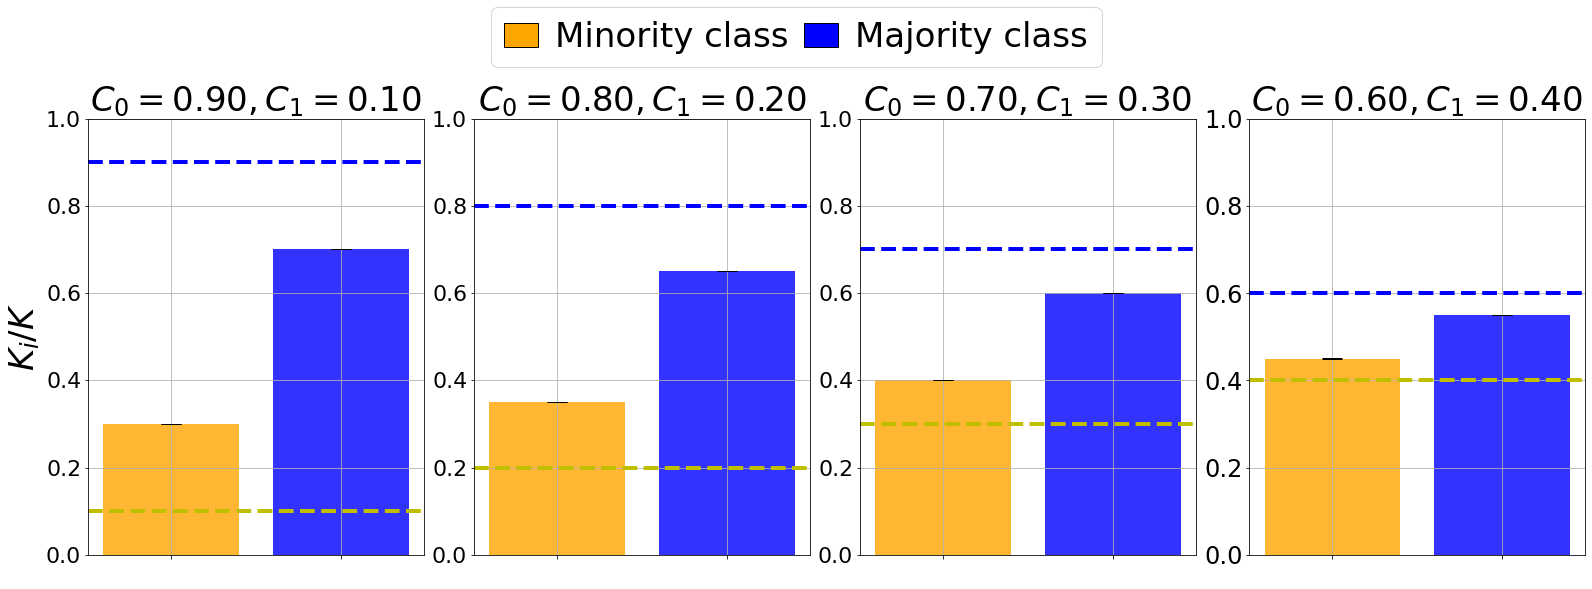

In [10]:
# Average degree barplot
fig, axes = plt.subplots(1, len(c0), figsize=(22,7), constrained_layout=True)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=34, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)


for i in range(len(c0)):
    x = ['    ', '     ']
    y = [avg_degree_minority[i], avg_degree_majority[i]]
    error = [std_degree_minority[i], std_degree_majority[i]]
    axes[i].bar(x, 
                y,
                yerr=error,
                align='center',
                alpha=0.8,
                ecolor='black',
                capsize=10,
                color=base_colors)
    
    #axes[i].set_title('P_0=%.2f, P_1=%.2f' % (p0[i], p1[i]))
    #axes[i].set_title('C_0=%.2f, C_1=%.2f' % (c0[i], c1[i]))
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0[i], c1[i]), fontsize=34)
    if i == 0:
        axes[i].set_ylabel(r'$K_i / K$', fontsize=34)
    axes[i].set_ylim(0.0, 1.0)
    # Reference lines
    axes[i].axhline(c0[i], linestyle='--', color='b', linewidth=4)
    axes[i].axhline(c1[i], linestyle='--', color='y', linewidth=4)
    axes[i].grid()
    
    for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        label.set_fontsize(22)

plt.yticks(fontsize=24)
plt.show()

### Degree distribution for several values of $C_0$ and $C_1$ <a class="anchor" id="chapter4"></a>

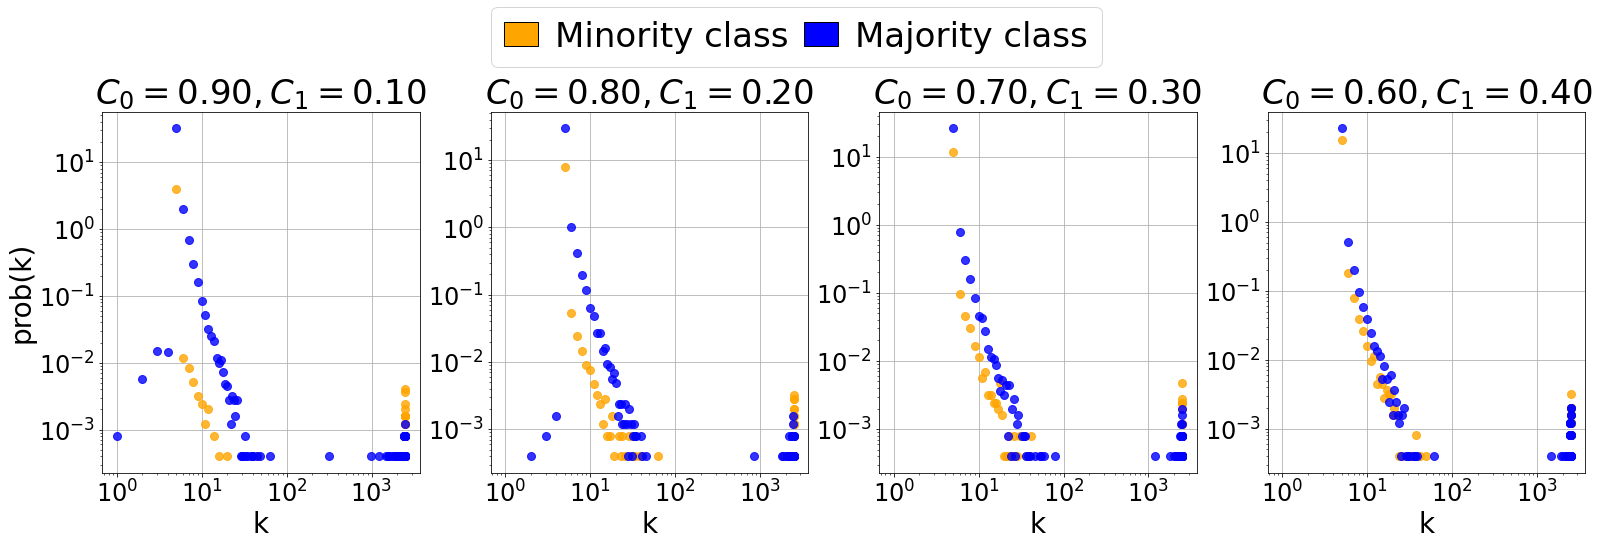

In [11]:
# Degree distribution plot
fig, axes = plt.subplots(1, len(c0), figsize=(22,6.5), constrained_layout=True)
#fig.suptitle('Distribució de grau de cada classe', fontsize=16)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=34, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

for i in range(len(c0)):
    # Plot the dist. of the minority class
    degree_hist = np.array(degree_dist_minority[i], dtype=float)
    degree_prob = degree_hist / len(degree_dist_minority[i])
    axes[i].loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[0], alpha=0.8, markersize=16)

    # Plot the dist. of the majority class
    degree_hist = np.array(degree_dist_majority[i], dtype=float)
    degree_prob = degree_hist / len(degree_dist_majority[i])
    axes[i].loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[1], alpha=0.8, markersize=16)

    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0[i], c1[i]),  fontsize=34)
    axes[i].grid()
    axes[i].set_xlabel('k', fontsize=28)
    if i == 0:
        axes[i].set_ylabel('prob(k)',  fontsize=28)
        
    for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        label.set_fontsize(24)

### Network examples for several values of $C_0$ and $C_1$ <a class="anchor" id="chapter5"></a>

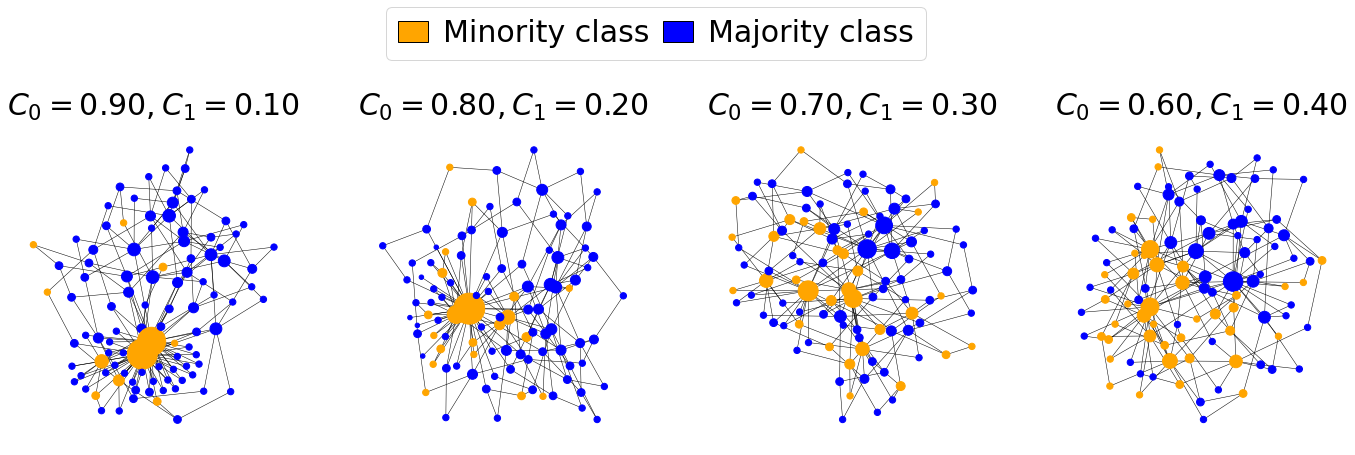

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(24,6))

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=30, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

c0_values = [0.9, 0.8, 0.7, 0.6]
c1_values = [0.1, 0.2, 0.3, 0.4]

for i in range(len(c0_values)):
    G, node_class, k_majority, k_minority = model.model(n=100, m=2, m0=5, c0=c0_values[i], p0=0.5, p1=0.5, p0i=0, p1i=0, beta=1.15)
    node_color = ['blue' if c == 0 else 'orange' for c in node_class]
    node_size = np.array(list(dict(G.degree()).values())) * 20
    nx.draw(G, node_color=node_color, ax=axes[i], node_size=node_size, width=0.5)
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0_values[i], c1_values[i]), fontsize=30)
    
plt.show()

###  Example of networks in scenarios in which $P_{0,i} = P_{1,i} = 1$ <a class="anchor" id="chapter6"></a>

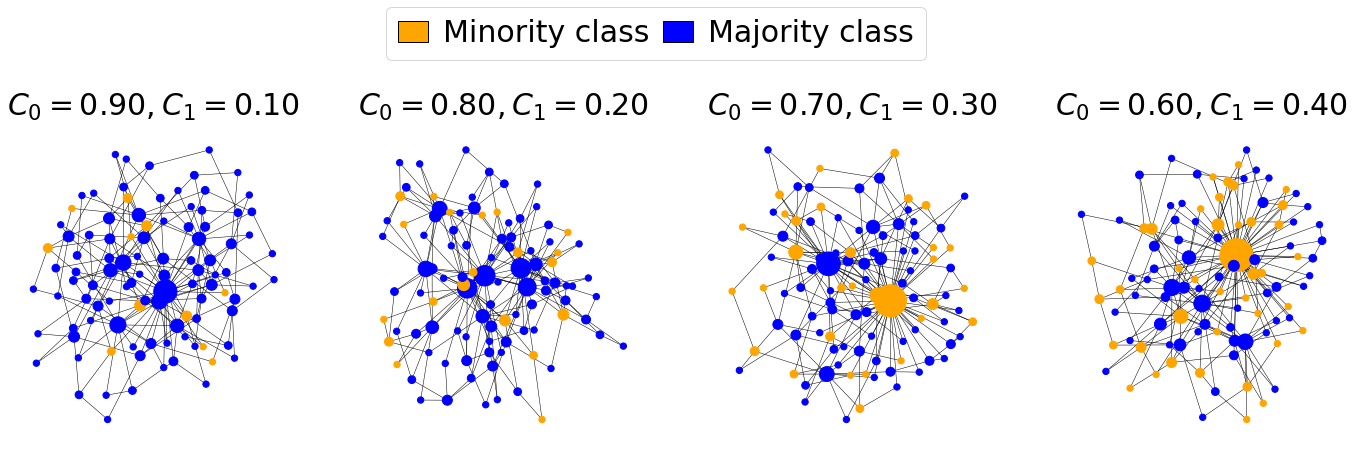

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(24,6))

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=30, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

c0_values = [0.9, 0.8, 0.7, 0.6]
c1_values = [0.1, 0.2, 0.3, 0.4]
p0_values = c0_values
p1_values = c1_values

for i in range(len(c0_values)):
    #G, node_class = model.model(n, m, c0, c1, h)
    G, node_class, k_majority, k_minority = model.model(n=100, m=2, m0=5, c0=c0_values[i], p0=p0_values[i], p1=p1_values[i], p0i=1, p1i=1, beta=1.15)
    node_color = ['blue' if c == 0 else 'orange' for c in node_class]
    node_size = np.array(list(dict(G.degree()).values())) * 20
    nx.draw(G, node_color=node_color, ax=axes[i], node_size=node_size, width=0.5)
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0_values[i], c1_values[i]), fontsize=30)
    
plt.show()

### Example of networks in scenarios in which the minority class is advantaged <a class="anchor" id="chapter7"></a>

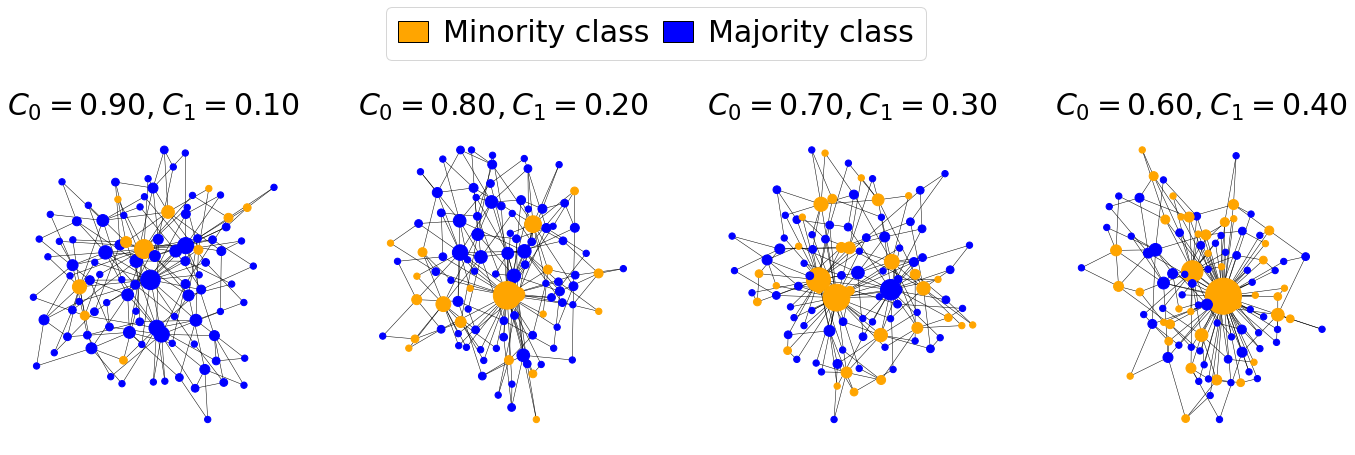

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(24,6))

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=30, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

c0_values = [0.9, 0.8, 0.7, 0.6]
c1_values = [0.1, 0.2, 0.3, 0.4]
p0_values = c0_values
p1_values = c1_values

for i in range(len(c0_values)):
    #G, node_class = model.model(n, m, c0, c1, h)
    G, node_class, k_majority, k_minority = model.model(n=100, m=2, m0=5, c0=c0_values[i], p0=p0_values[i], p1=p1_values[i], p0i=1, p1i=0, beta=1.15)
    node_color = ['blue' if c == 0 else 'orange' for c in node_class]
    node_size = np.array(list(dict(G.degree()).values())) * 20
    nx.draw(G, node_color=node_color, ax=axes[i], node_size=node_size, width=0.5)
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0_values[i], c1_values[i]), fontsize=30)
    
plt.show()

### Example of networks in scenarios in which the majority class is advantaged <a class="anchor" id="chapter8"></a>

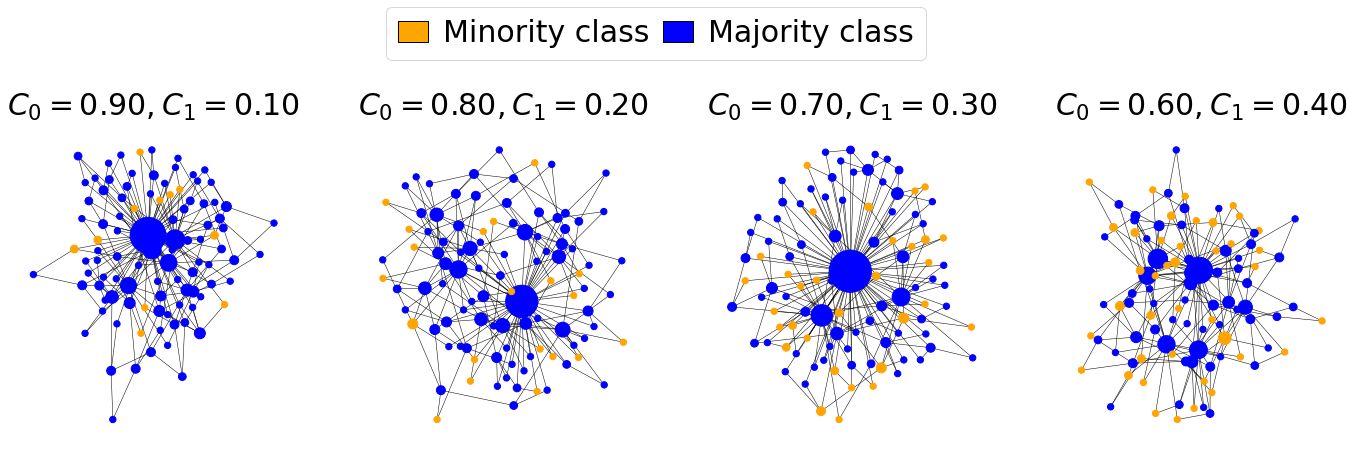

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(24,6))

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=30, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

c0_values = [0.9, 0.8, 0.7, 0.6]
c1_values = [0.1, 0.2, 0.3, 0.4]
p0_values = c0_values
p1_values = c1_values

for i in range(len(c0_values)):
    #G, node_class = model.model(n, m, c0, c1, h)
    G, node_class, k_majority, k_minority = model.model(n=100, m=2, m0=5, c0=c0_values[i], p0=p0_values[i], p1=p1_values[i], p0i=0, p1i=1, beta=1.15)
    node_color = ['blue' if c == 0 else 'orange' for c in node_class]
    node_size = np.array(list(dict(G.degree()).values())) * 20
    nx.draw(G, node_color=node_color, ax=axes[i], node_size=node_size, width=0.5)
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0_values[i], c1_values[i]), fontsize=30)
    
plt.show()

### Minority class degree in scenarios without expected overrepresentation of any class <a class="anchor" id="chapter9"></a>

In [16]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/p0i_0.2_p1i_0.2'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0.2, 0.2, 0.2, 0.2]
p1i = [0.2, 0.2, 0.2, 0.2]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [17]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_5'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [0.5, 0.5, 0.5, 0.5]
#p0i = [0, 0, 0, 0]
#p1i = [1, 1, 1, 1]
#p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20


avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [18]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/p0i_0.7_p1i_0.7'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0.7, 0.7, 0.7, 0.7]
p1i = [0.7, 0.7, 0.7, 0.7]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [19]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_9'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [1, 1, 1, 1]
#p0i = [0, 0, 0, 0]
#p1i = [1, 1, 1, 1]
#p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20

#avg_degree_majority, avg_degree_minority, std_degree_majority, std_degree_minority, degree_dist_majority, degree_dist_minority, degree_growth_majority_experiment, degree_growth_minority_experiment, results, step = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)
avg_degree_majority_4, avg_degree_minority_4, std_degree_majority_4, std_degree_minority_4, degree_dist_majority_4, degree_dist_minority_4, degree_growth_majority_experiment_4, degree_growth_minority_experiment_4, results_4, step_4, avg_degree_majority_list_4, avg_degree_minority_list_4 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

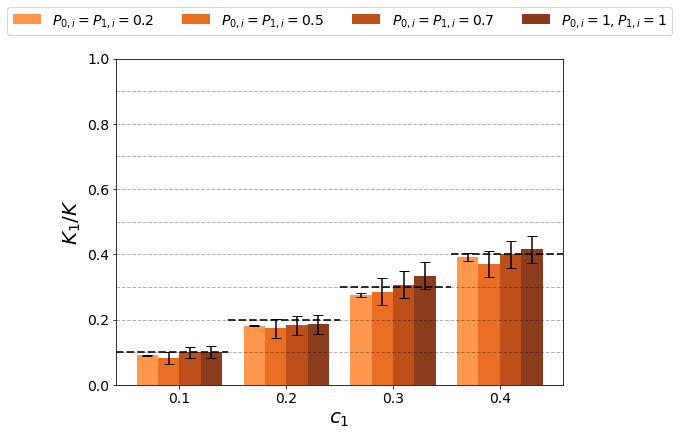

In [20]:
# create data
x = np.arange(4)
y1 = avg_degree_minority_1
y2 = avg_degree_minority_2
y3 = avg_degree_minority_3
y4 = avg_degree_minority_4

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Oranges(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.bar(x-0.3, y1, width, yerr=std_degree_minority_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0.1, y2, width, yerr=std_degree_minority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.1, y3, width, yerr=std_degree_minority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.bar(x+0.3, y4, width, yerr=std_degree_minority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[3])

plt.xticks(x, ['0.1', '0.2', '0.3', '0.4'])
plt.xlabel(r"$c_1$", fontsize=20)
plt.ylabel(r"$K_1 / K$", fontsize=20)
plt.legend([r"$P_{0,i}=P_{1,i}=0.2$", "$P_{0,i}=P_{1,i}=0.5$", "$P_{0,i}=P_{1,i}=0.7$", r"$P_{0,i}=1, P_{1,i}=1$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=14)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    

plt.axhline(y=0.1, xmin=0, xmax=0.25, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.2, xmin=0.25, xmax=0.5, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.3, xmin=0.5, xmax=0.75, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.4, xmin=0.75, xmax=1, linewidth=2, linestyle='--', color='k', alpha=0.8)
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
    
plt.ylim(0, 1)
plt.show()

### Relative overrepresentation of the minority class for several values of $m$ <a class="anchor" id="chapter10"></a>

In [21]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_2_iters_20/exec_7'

In [22]:
n = 5000
m = 2
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [23]:
np.abs(np.array(avg_degree_minority_1) - np.array(c1)) / np.array(avg_degree_minority_1)

array([0.73755168, 0.64357855, 0.53294628, 0.42472803])

In [24]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_7'

In [25]:
n = 5000
m = 5
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [26]:
np.abs(np.array(avg_degree_minority_2) - np.array(c1)) / np.array(avg_degree_minority_2)

array([0.56205725, 0.55911089, 0.48428166, 0.42656418])

In [27]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_9_iters_20/exec_7'

In [28]:
n = 5000
m = 9
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [29]:
np.abs(np.array(avg_degree_minority_3) - np.array(c1)) / np.array(avg_degree_minority_3)

array([0.44215862, 0.43909681, 0.44629616, 0.39711835])

In [30]:
avg_degree_minority_list_1 = np.array(avg_degree_minority_list_1)
avg_degree_minority_list_2 = np.array(avg_degree_minority_list_2)
avg_degree_minority_list_3 = np.array(avg_degree_minority_list_3)

In [31]:
# Compute the standard deviation in each scenario
std_1 = np.std(avg_degree_minority_list_1, axis=1)
std_2 = np.std(avg_degree_minority_list_2, axis=1)
std_3 = np.std(avg_degree_minority_list_3, axis=1)

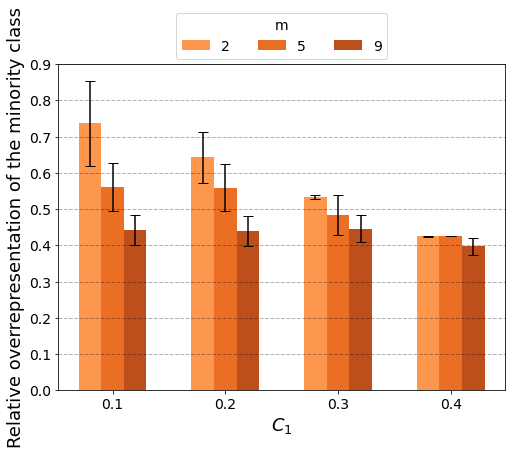

In [32]:
# create data
x = np.arange(4)
y1 = np.abs(np.array(avg_degree_minority_1) - np.array(c1)) / np.array(avg_degree_minority_1)
y2 = np.abs(np.array(avg_degree_minority_2) - np.array(c1)) / np.array(avg_degree_minority_2)
y3 = np.abs(np.array(avg_degree_minority_3) - np.array(c1)) / np.array(avg_degree_minority_3)

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Oranges(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.bar(x-0.2, y1, width, yerr=std_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.1', '0.2', '0.3', '0.4'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$C_1$", fontsize=18)
plt.ylabel("Relative overrepresentation of the minority class", fontsize=18)
plt.legend(["2", "5", "9"], title="m", loc='upper center',  bbox_to_anchor=(0.5, 1.18),
            fancybox=True, shadow=False, ncol=5, fontsize=14, title_fontsize=14)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    
plt.ylim(0, 0.9)
plt.show()

### Relative overrepresentation of the majority class for several values of $m$ <a class="anchor" id="chapter11"></a>

In [33]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_2_iters_20/exec_3'

In [34]:
n = 5000
m = 2
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [35]:
np.abs(np.array(avg_degree_minority_1) - np.array(c1)) / np.array(avg_degree_minority_1)

array([0.97985473, 0.97805565, 0.98869139, 0.99416589])

In [36]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_3'

In [37]:
n = 5000
m = 5
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [38]:
np.abs(np.array(avg_degree_minority_2) - np.array(c1)) / np.array(avg_degree_minority_2)

array([0.99292911, 0.99143188, 0.99580643, 0.99766941])

In [39]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_9_iters_20/exec_3'

In [40]:
n = 5000
m = 9
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [41]:
np.abs(np.array(avg_degree_minority_3) - np.array(c1)) / np.array(avg_degree_minority_3)

array([0.99272814, 0.99283511, 0.99607032, 0.99689062])

In [42]:
avg_degree_minority_list_1 = np.array(avg_degree_minority_list_1)
avg_degree_minority_list_2 = np.array(avg_degree_minority_list_2)
avg_degree_minority_list_3 = np.array(avg_degree_minority_list_3)

In [43]:
# Compute the standard deviation in each scenario
std_1 = np.std(avg_degree_majority_list_1, axis=1)
std_2 = np.std(avg_degree_majority_list_2, axis=1)
std_3 = np.std(avg_degree_majority_list_3, axis=1)

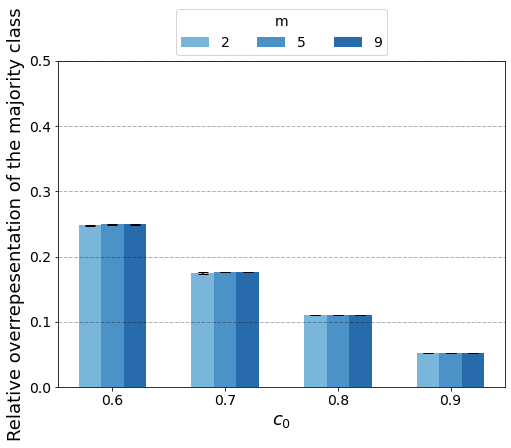

In [44]:
# create data
x = np.arange(4)
y1 = np.abs(np.array(avg_degree_majority_1) - np.array(c0)) / np.array(avg_degree_majority_1)
y2 = np.abs(np.array(avg_degree_majority_2) - np.array(c0)) / np.array(avg_degree_majority_2)
y3 = np.abs(np.array(avg_degree_majority_3) - np.array(c0)) / np.array(avg_degree_majority_3)

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Blues(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.bar(x-0.2, y1, width, yerr=std_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.6', '0.7', '0.8', '0.9'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("$c_0$", fontsize=18)
plt.ylabel("Relative overrepesentation of the majority class", fontsize=18)
plt.legend(["2", "5", "9"], title="m", loc='upper center',  bbox_to_anchor=(0.5, 1.18),
            fancybox=True, shadow=False, ncol=5, fontsize=14, title_fontsize=14)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    
plt.ylim(0, 0.5)
plt.show()

### Minority class degree in favourable scenarios <a class="anchor" id="chapter12"></a>

In [45]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_7'

In [46]:
n = 5000
m = 5
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [47]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_8'

In [48]:
n = 5000
m = 5
m0 = 10
#c0 = [0.9, 0.8, 0.7, 0.6]
#c1 = [0.1, 0.2, 0.3, 0.4]
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0i = [1, 1, 1, 1]
p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [49]:
np.abs(np.array(avg_degree_majority_2) - np.array(c0)) / np.array(avg_degree_majority_2)

array([0.03078159, 0.17617262, 0.42234948, 0.42530819])

In [50]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_4'

In [51]:
n = 5000
m = 5
m0 = 10
#c0 = [0.9, 0.8, 0.7, 0.6]
#c1 = [0.1, 0.2, 0.3, 0.4]
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

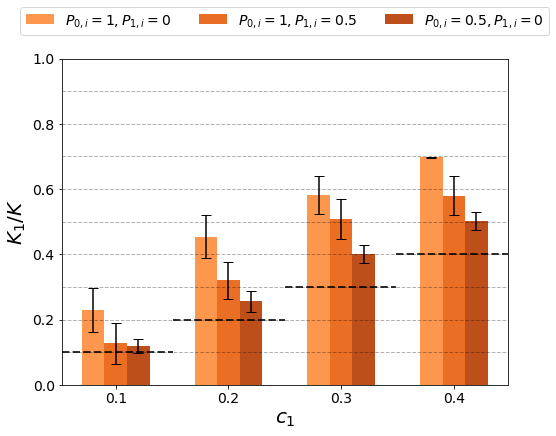

In [52]:
# create data
x = np.arange(4)
y1 = avg_degree_minority_1
y2 = avg_degree_minority_2
y3 = avg_degree_minority_3
#y1, y2, y3 = y3, y2, y1
#std_1, std_2, std_3 = std_3, std_2, std_1
#y1, err_1 = rel_or_1, std_1
#y2, err_2 = rel_or_2, std_2
#y3, err_3 = rel_or_3, std_3
width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Oranges(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.bar(x-0.2, y1, width, yerr=std_degree_minority_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_degree_minority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_degree_minority_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.1', '0.2', '0.3', '0.4'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$c_1$", fontsize=20)
plt.ylabel(r"$K_1 / K$", fontsize=20)
plt.legend([r"$P_{0,i}=1, P_{1,i}=0$", r"$P_{0,i}=1, P_{1,i}=0.5$", r"$P_{0,i}=0.5, P_{1,i}=0$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=14)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    

plt.axhline(y=0.1, xmin=0, xmax=0.25, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.2, xmin=0.25, xmax=0.5, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.3, xmin=0.5, xmax=0.75, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.4, xmin=0.75, xmax=1, linewidth=2, linestyle='--', color='k', alpha=0.8)
    
plt.ylim(0, 1)
plt.show()

### Majority class degree in unfavourable scenarios <a class="anchor" id="chapter13"></a>

In [53]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_7'

In [54]:
n = 5000
m = 5
m0 = 10
#c0 = [0.9, 0.8, 0.7, 0.6]
#c1 = [0.1, 0.2, 0.3, 0.4]
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [1, 1, 1, 1]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [55]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_8'

In [56]:
n = 5000
m = 5
m0 = 10
#c0 = [0.9, 0.8, 0.7, 0.6]
#c1 = [0.1, 0.2, 0.3, 0.4]
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0i = [1, 1, 1, 1]
p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [57]:
np.abs(np.array(avg_degree_majority_2) - np.array(c0)) / np.array(avg_degree_majority_2)

array([0.42530819, 0.42234948, 0.17617262, 0.03078159])

In [58]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_4'

In [59]:
n = 5000
m = 5
m0 = 10
#c0 = [0.9, 0.8, 0.7, 0.6]
#c1 = [0.1, 0.2, 0.3, 0.4]
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [0, 0, 0, 0]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

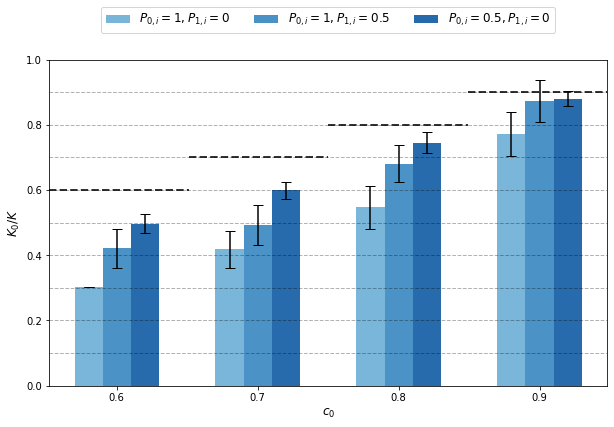

In [60]:
# create data
x = np.arange(4)
y1 = avg_degree_majority_1
y2 = avg_degree_majority_2
y3 = avg_degree_majority_3

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Blues(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.bar(x-0.2, y1, width, yerr=std_degree_majority_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_degree_majority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_degree_majority_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.6', '0.7', '0.8', '0.9'])
plt.xlabel(r"$c_0$", fontsize=12)
plt.ylabel(r"$K_0 / K$", fontsize=12)
plt.legend([r"$P_{0,i}=1, P_{1,i}=0$", r"$P_{0,i}=1, P_{1,i}=0.5$", r"$P_{0,i}=0.5, P_{1,i}=0$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=12)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)


plt.axhline(y=0.6, xmin=0, xmax=0.25, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.7, xmin=0.25, xmax=0.5, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.8, xmin=0.5, xmax=0.75, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.9, xmin=0.75, xmax=1, linewidth=2, linestyle='--', color='k', alpha=0.8)

plt.ylim(0, 1)
plt.show()

### Majority class degree in favourable scenarios <a class="anchor" id="chapter14"></a>

In [61]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_3'

In [62]:
n = 5000
m = 5
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [63]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_6'

In [64]:
n = 5000
m = 5
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [65]:
np.abs(np.array(avg_degree_majority_2) - np.array(c0)) / np.array(avg_degree_majority_2)

array([0.23175585, 0.15950092, 0.11043406, 0.05231897])

In [66]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_2'

In [67]:
n = 5000
m = 5
m0 = 10
c0 = [0.6, 0.7, 0.8, 0.9]
c1 = [0.4, 0.3, 0.2, 0.1]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

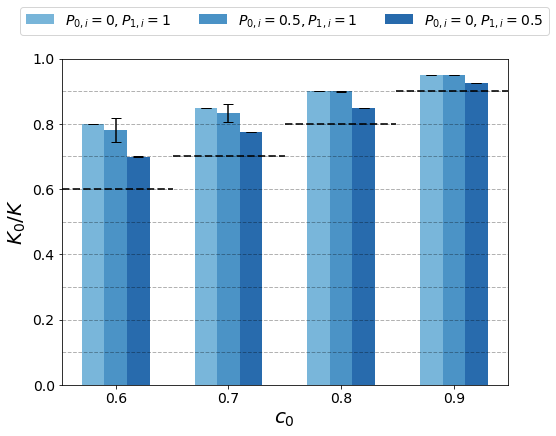

In [68]:
# create data
x = np.arange(4)
y1 = avg_degree_majority_1
y2 = avg_degree_majority_2
y3 = avg_degree_majority_3

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Blues(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.bar(x-0.2, y1, width, yerr=std_degree_majority_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_degree_majority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_degree_majority_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.6', '0.7', '0.8', '0.9'], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r"$c_0$", fontsize=20)
plt.ylabel(r"$K_0 / K$", fontsize=20)
plt.legend([r"$P_{0,i}=0, P_{1,i}=1$", r"$P_{0,i}=0.5, P_{1,i}=1$", r"$P_{0,i}=0, P_{1,i}=0.5$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=14)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)

plt.axhline(y=0.6, xmin=0, xmax=0.25, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.7, xmin=0.25, xmax=0.5, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.8, xmin=0.5, xmax=0.75, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.9, xmin=0.75, xmax=1, linewidth=2, linestyle='--', color='k', alpha=0.8)
    
plt.ylim(0, 1)
plt.show()

### Minority class degree in unfavourable scenarios <a class="anchor" id="chapter15"></a>

In [69]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/p0i_0.2_p1i_0.2'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0.2, 0.2, 0.2, 0.2]
p1i = [0.2, 0.2, 0.2, 0.2]
beta = 1.15
n_simulations = 20

avg_degree_majority_1, avg_degree_minority_1, std_degree_majority_1, std_degree_minority_1, degree_dist_majority_1, degree_dist_minority_1, degree_growth_majority_experiment_1, degree_growth_minority_experiment_1, results_1, step_1, avg_degree_majority_list_1, avg_degree_minority_list_1 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [70]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_3'

In [71]:
n = 5000
m = 5
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [72]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_6'

In [73]:
n = 5000
m = 5
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority_2, avg_degree_minority_2, std_degree_majority_2, std_degree_minority_2, degree_dist_majority_2, degree_dist_minority_2, degree_growth_majority_experiment_2, degree_growth_minority_experiment_2, results_2, step_2, avg_degree_majority_list_2, avg_degree_minority_list_2 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

In [74]:
np.abs(np.array(avg_degree_majority_2) - np.array(c0)) / np.array(avg_degree_majority_2)

array([0.05231897, 0.11043406, 0.15950092, 0.23175585])

In [75]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_2'

In [76]:
n = 5000
m = 5
m0 = 10
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = c1
p0i = [0, 0, 0, 0]
p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20

avg_degree_majority_3, avg_degree_minority_3, std_degree_majority_3, std_degree_minority_3, degree_dist_majority_3, degree_dist_minority_3, degree_growth_majority_experiment_3, degree_growth_minority_experiment_3, results_3, step_3, avg_degree_majority_list_3, avg_degree_minority_list_3 = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

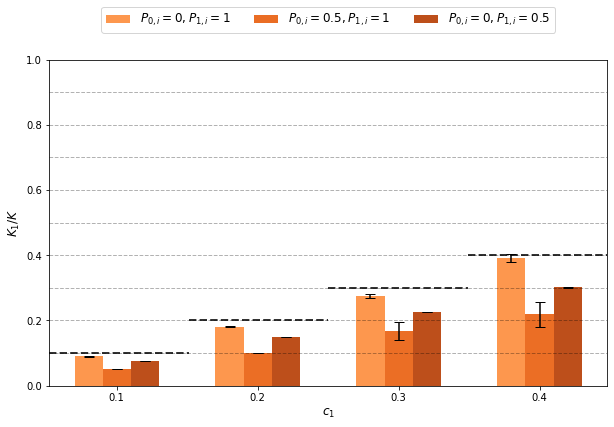

In [77]:
# create data
x = np.arange(4)
y1 = avg_degree_minority_1
y2 = avg_degree_minority_2
y3 = avg_degree_minority_3

width = 0.2

evenly_spaced_interval = np.linspace(0.5, 1, 4)
colors = [plt.cm.Oranges(x) for x in evenly_spaced_interval]

# plot data in grouped manner of bar type
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.bar(x-0.2, y1, width, yerr=std_degree_minority_1, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[0])
plt.bar(x-0, y2, width, yerr=std_degree_minority_2, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[1])
plt.bar(x+0.2, y3, width, yerr=std_degree_minority_3, align='center', alpha=0.9, ecolor='black', capsize=5, color=colors[2])
plt.xticks(x, ['0.1', '0.2', '0.3', '0.4'])
plt.xlabel(r"$c_1$", fontsize=12)
plt.ylabel(r"$K_1 / K$", fontsize=12)
plt.legend([r"$P_{0,i}=0, P_{1,i}=1$", r"$P_{0,i}=0.5, P_{1,i}=1$", r"$P_{0,i}=0, P_{1,i}=0.5$"], 
            title="", loc='upper center',  bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False, ncol=5,
            fontsize=12)
    
for v in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.axhline(v, linewidth=1, linestyle='--', color='k', alpha=0.3)
    
plt.axhline(y=0.1, xmin=0, xmax=0.25, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.2, xmin=0.25, xmax=0.5, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.3, xmin=0.5, xmax=0.75, linewidth=2, linestyle='--', color='k', alpha=0.8)
plt.axhline(y=0.4, xmin=0.75, xmax=1, linewidth=2, linestyle='--', color='k', alpha=0.8)
    
plt.ylim(0, 1)
plt.show()

### Few-get-richer effect (also the plots in the appendix) <a class="anchor" id="chapter16"></a>

Variables should be modified to generate each of the plots that appear in the appendix related with the few-get-richer effect.

In [78]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/few_get_richer/few_get_richer_m_5_p0_0.2_p0i_0.5_p1i_0.5'

In [79]:
n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = [0.2, 0.2, 0.2, 0.2]
p1 = [0.8, 0.8, 0.8, 0.8]
p0i = [0.5, 0.5, 0.5, 0.5]
p1i = [0.5, 0.5, 0.5, 0.5]
beta = 1.15
n_simulations = 20


avg_degree_majority, avg_degree_minority, std_degree_majority, std_degree_minority, degree_dist_majority, degree_dist_minority, degree_growth_majority_experiment, degree_growth_minority_experiment, results, step, avg_degree_majority_list, avg_degree_minority_list = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

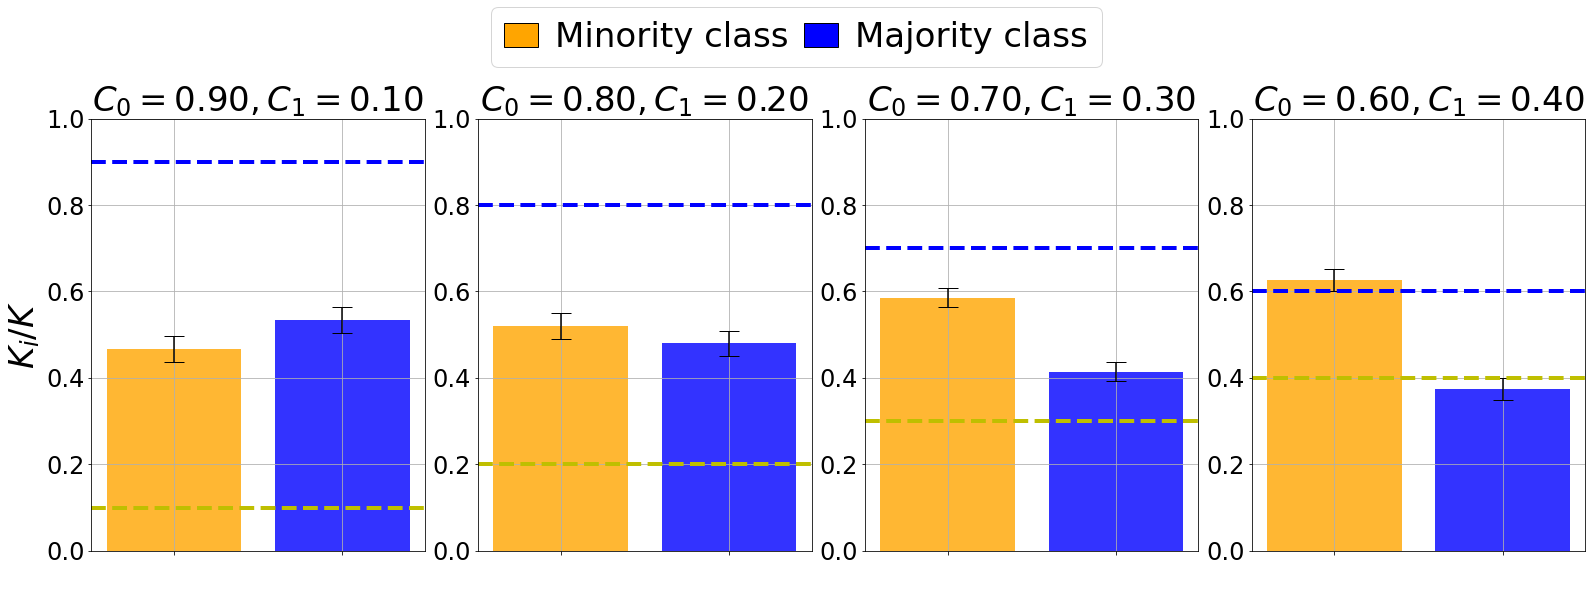

In [80]:
# Average degree barplot
fig, axes = plt.subplots(1, len(c0), figsize=(22,7), constrained_layout=True)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=34, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)


for i in range(len(c0)):
    x = ['    ', '     ']
    y = [avg_degree_minority[i], avg_degree_majority[i]]
    error = [std_degree_minority[i], std_degree_majority[i]]
    axes[i].bar(x, 
                y,
                yerr=error,
                align='center',
                alpha=0.8,
                ecolor='black',
                capsize=10,
                color=base_colors)
    
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0[i], c1[i]), fontsize=34)
    if i == 0:
        axes[i].set_ylabel(r'$K_i / K$', fontsize=34)
    axes[i].set_ylim(0.0, 1.0)
    # Reference lines
    axes[i].axhline(c0[i], linestyle='--', color='b', linewidth=4)
    axes[i].axhline(c1[i], linestyle='--', color='y', linewidth=4)
    axes[i].grid()
    
    for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        label.set_fontsize(24)
        
plt.show()

### Degree growth and degree distribution plots (Appendix) <a class="anchor" id="chapter17"></a>

Variables should be modified to generate each of the plots that appear in the appendix to explore the degree growth and degree distribution of the model in more scenarios.

In [81]:
current_path = os.path.abspath(os.getcwd()).replace('\\', '/')
current_path += '/outputs_2/m_5_iters_20/exec_9'

n = 5000
m0 = 10
m = 5
c0 = [0.9, 0.8, 0.7, 0.6]
c1 = [0.1, 0.2, 0.3, 0.4]
p0 = c0
p1 = p0
p0i = [1, 1, 1, 1]
p1i = [1, 1, 1, 1]
# [0, 0, 0, 0]
# [0.5, 0.5, 0.5, 0.5]
# [1, 1, 1, 1]
beta = 1.15
n_simulations = 20

avg_degree_majority, avg_degree_minority, std_degree_majority, std_degree_minority, degree_dist_majority, degree_dist_minority, degree_growth_majority_experiment, degree_growth_minority_experiment, results, step, avg_degree_majority_list, avg_degree_minority_list = graphics.load_data_for_plots(n=n, m=m, m0=m0, c0=c0, p0=p0, p1=p1, p0i=p0i, p1i=p1i, n_simulations=n_simulations, beta=beta, folder_name=current_path)

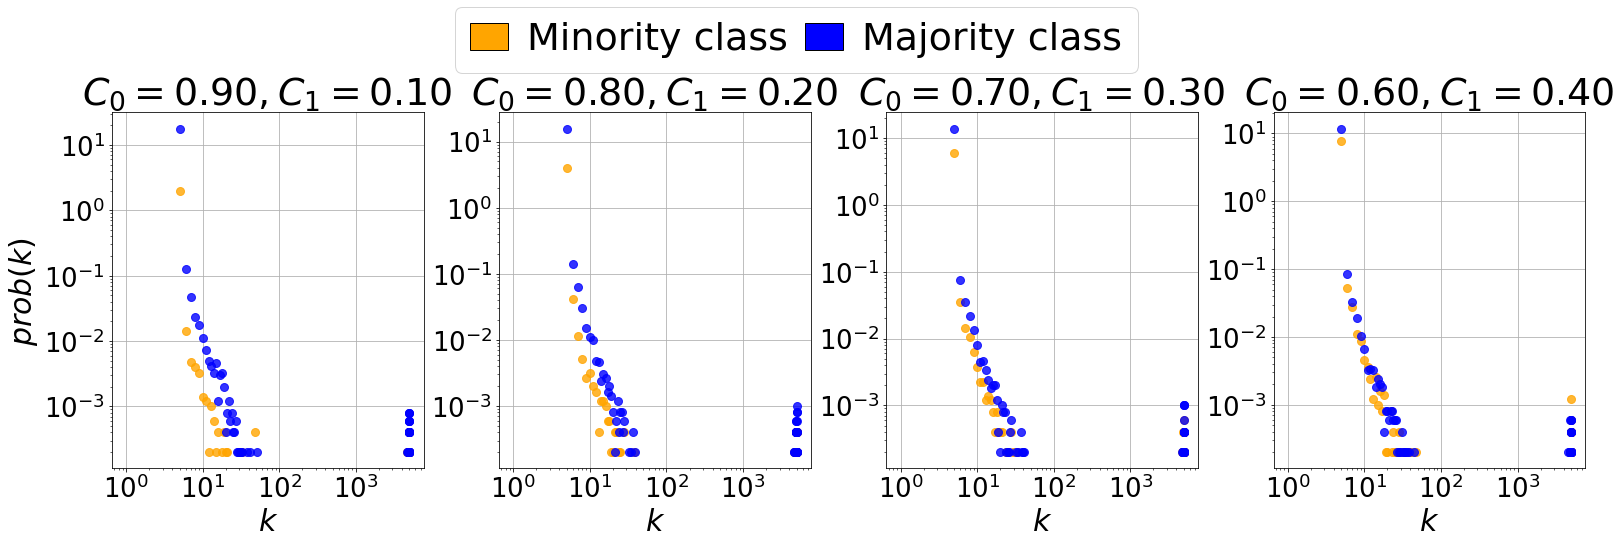

In [82]:
# Degree distribution plot
fig, axes = plt.subplots(1, len(c0), figsize=(22,6.5), constrained_layout=True)
#fig.suptitle('Distribució de grau de cada classe', fontsize=16)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=38, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

for i in range(len(c0)):
    # Plot the dist. of the minority class
    degree_hist = np.array(degree_dist_minority[i], dtype=float)
    degree_prob = degree_hist / len(degree_dist_minority[i])
    axes[i].loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[0], alpha=0.8, markersize=16)

    # Plot the dist. of the majority class
    degree_hist = np.array(degree_dist_majority[i], dtype=float)
    degree_prob = degree_hist / len(degree_dist_majority[i])
    axes[i].loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[1], alpha=0.8, markersize=16)

    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0[i], c1[i]),  fontsize=38)
    axes[i].grid()
    axes[i].set_xlabel('$k$', fontsize=30)
    if i == 0:
        axes[i].set_ylabel('$prob(k)$',  fontsize=30)
        
    for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        label.set_fontsize(26)

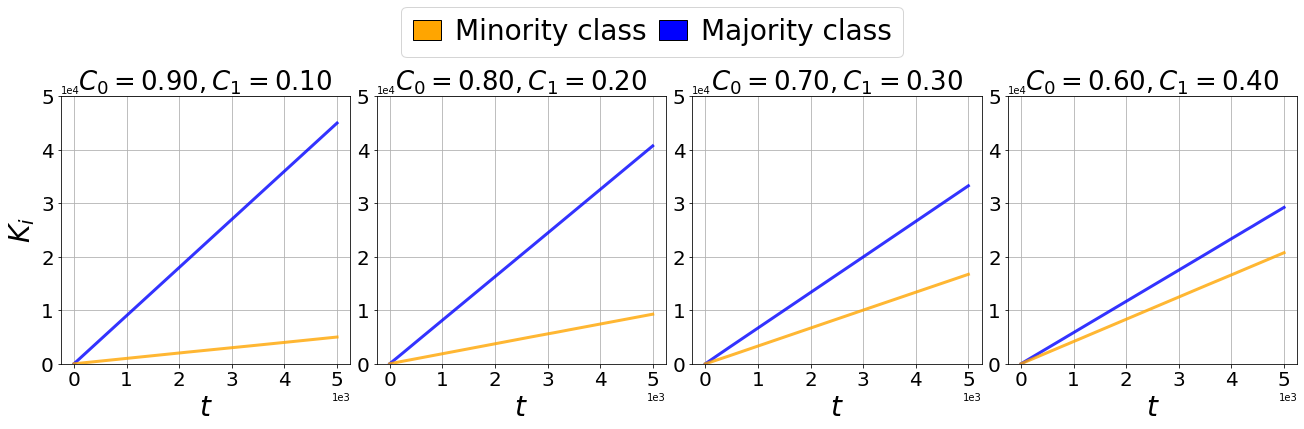

In [83]:
# Degree growth
fig, axes = plt.subplots(1, len(c0), figsize=(18,5), constrained_layout=True)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=28, bbox_to_anchor=(0.5, 1.20), fancybox=True, shadow=False)

for i in range(len(c0)):
    axes[i].plot([j for j in range(n)] ,degree_growth_majority_experiment[i], color=base_colors[1], linewidth=3, alpha=0.8)
    axes[i].plot([j for j in range(n)] ,degree_growth_minority_experiment[i], color=base_colors[0], linewidth=3, alpha=0.8)

    if i == 0:
        axes[i].set_ylabel('$K_i$', fontsize=28)
    axes[i].set_xlabel('$t$', fontsize=28)
    axes[i].set_title(r'$C_0=%.2f, C_1=%.2f$' % (c0[i], c1[i]), fontsize=26)
    
    for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        label.set_fontsize(20)
    
    axes[i].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    axes[i].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
    axes[i].set_ylim(0,5*10**4)
    
    axes[i].grid()

### Degree distribution anomalies (Appendix) <a class="anchor" id="chapter18"></a>

Code to search for degree distribution anomalies, which are explained in the appendix. To do so, we run the below cells until this phenomenon appears.

In [36]:
# Generate a graph in which the minority class size is very small.
G, node_class, k_majority, k_minority = model.model(n=5000, m=5, m0=10, c0=0.9, p0=0.5, p1=0.5, p0i=0, p1i=0, beta=1.15)

node_color = ['blue' if c == 0 else 'orange' for c in node_class]

In [37]:
# Compute minority  and majority class distribution
# Code extracted from model.py

nodes_degree = G.degree()
degrees_minority = sorted([degree for node, degree in nodes_degree if node_class[node] == 1])
max_minority = max(degrees_minority)
ctr_max = Counter(degrees_minority)
data_minority = [ctr_max[i] if i in ctr_max else 0 for i in range(max_minority)]
data_minority

degrees_majority = sorted([degree for node, degree in nodes_degree if node_class[node] == 0])
max_majority = max(degrees_majority)
ctr_max = Counter(degrees_majority)
data_majority = [ctr_max[i] if i in ctr_max else 0 for i in range(max_majority)]

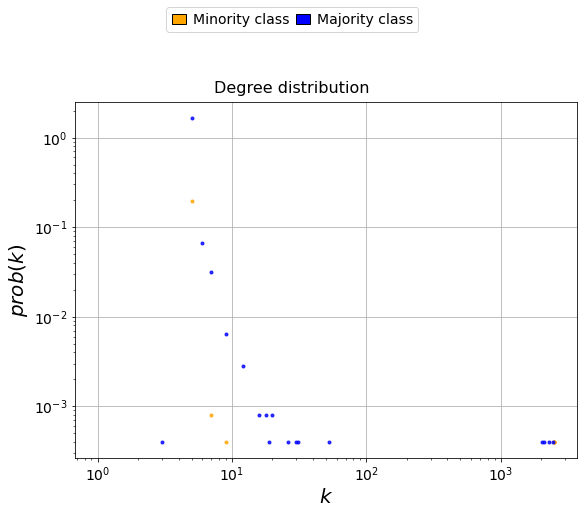

In [50]:
# Degree distribution plot
fig, axes = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
fig.suptitle('Degree distribution', fontsize=16)

from matplotlib.patches import Patch
pa1 = Patch(facecolor=base_colors[0], edgecolor='black')
pa2 = Patch(facecolor=base_colors[1], edgecolor='black')

fig.legend(handles=[pa1, pa2],
          title="", loc='upper center',
          labels=['Minority class   ', 'Majority class'],
          ncol=4, handletextpad=0.5, handlelength=1, columnspacing=-0.5,
          fontsize=14, bbox_to_anchor=(0.5, 1.18), fancybox=True, shadow=False)

# Plot the dist. of the minority class
degree_hist = np.array(data_minority, dtype=float)
degree_prob = degree_hist / len(data_minority)
axes.loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[0], alpha=0.8, markevery=0.1)

# Plot the dist. of the majority class
degree_hist = np.array(data_majority, dtype=float)
degree_prob = degree_hist / len(data_majority)
axes.loglog(np.arange(degree_prob.shape[0]),degree_prob,'.', color=base_colors[1], alpha=0.8, markevery=0.1)

axes.grid()
axes.set_xlabel('$k$', fontsize=20)
axes.set_ylabel('$prob(k)$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

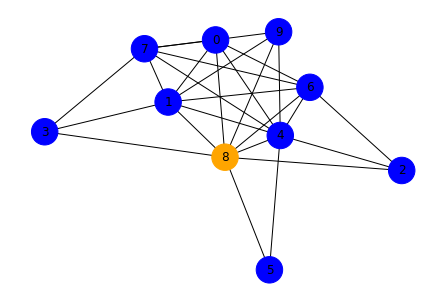

In [42]:
# Plot the initial graph
initial_graph = G.subgraph(list(range(0,10)))
node_color = ['blue' if c == 0 else 'orange' for c in node_class][:10]
nx.draw(initial_graph, node_color=node_color, with_labels=True, node_size=700)
plt.show()